In [1]:
from IPython.core.display import HTML, Image
css_file = '../../msc/custom.css' 
HTML(open(css_file, 'r').read())

# Object-Oriented Programming


In this lecture, we will study Object-Oriented Programming (OOP) and discover that there is a tight link between this programming paradigm and economics. To keep economics front and center, we will explore the usefulness of the OOP by implementing a seminal paper by Gary Becker.

> Gary S. Becker (1962). Irrational Behavior and Economic Theory, *Journal of Political Economy*, 70(1): 1-13.

**Roadmap**
* Basics of Object-Oriented Programming
* Irrational Behavior and Economic Theory
 * Implementation


## Basics of Object-Oriented Programming

What are the potential advantages of an OOP implementation?

* Modularization of Code, i.e. grouping of data and functions
* Elegance of Implementation
* Understanding of Problem

However, as we know from our implementation of the generalized Roy model the execution speed often suffers. 

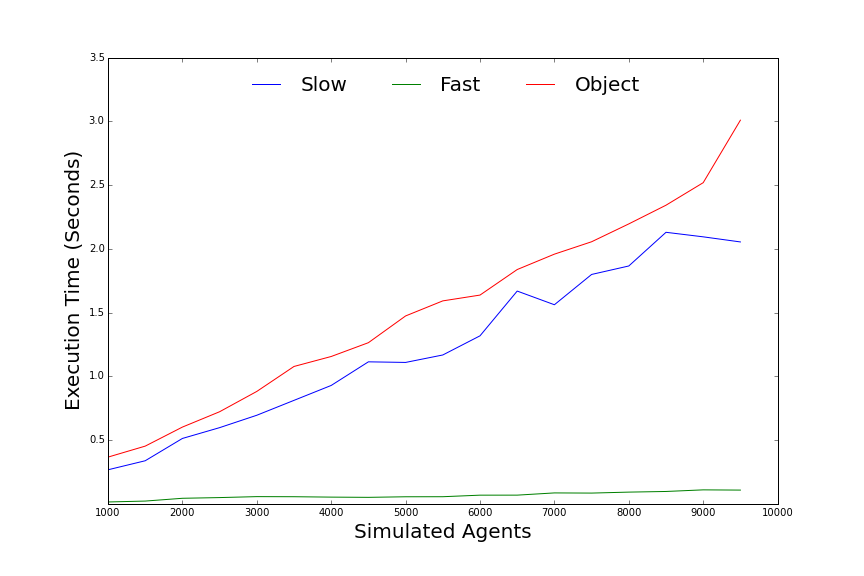

In [2]:
Image(filename='images/profiling.png')

Keywords:

* Encapsulation
* Inheritance
* Polymorphism

You will see all these elements in our implementation of Becker (1962). Let us get started with a basic example.

In [3]:
class Agent:
    def __init__(self, endowment):
        """ Initialize agents with endowment.
        """
        # Endowment
        self.endowment = endowment

        # Demands 
        self.butter = None
        self.milk = None
        
    def choose(self, price_butter, price_milk):
        """ Allocate half of endowment to each
            of the two goods.
        """
        self.butter = self.endowment/price_butter
        self.milk   = self.endowment/price_milk
        
    def get_demands(self):
        """ Return demands.
        """
        return self.butter, self.milk
    

# Initialize and agent with an endowment
ENDOWMENT, PRICE_BUTTER, PRICE_MILK = 10, 2, 3

agent_obj = Agent(ENDOWMENT)

agent_obj.choose(PRICE_BUTTER, PRICE_MILK)

print ' Let us have a look at the demand for the two goods: '
print '... using the demand() method      ', agent_obj.get_demands()
print '... accessing the class attributes ', (agent_obj.butter, agent_obj.milk)


 Let us have a look at the demand for the two goods: 
... using the demand() method       (5, 3)
... accessing the class attributes  (5, 3)


## Irrational Behavior and Economics Theory

The purpose of the paper is 
> ... to show how important theorems of modern economics result from general principle which not only includes rational behavior and survival arguments as special cases, but also much more irrational behavior. 

Becker's main conclusion follows:

> ... economic theory is much more compatible with irrational behavior than had previoulsy been suspected.  

In particular, Becker studies the robustness of the fundamental theorem of household demand:

> ... that the demand curve for any commodity, real income held constant, must be negatively inclined.  

Figure 1 from the paper allows us to briefly discuss the traditional theory. 

<img src="images/figure_1.png">

Let us use Figure 2 from the paper to discuss a more general approach.

<img src="images/figure_2.png">

Overall Becker concludes:

> The fundamental theorem of traditional theory - that demand curves are negatively declined - largely results from the change in opportunities alone and is largely independent of the decicion rule.

In an nutshell, even an irrational agent has to live within his means. 

### Implementation

In [4]:
# Fundamental Numerical Methods
import numpy as np

# System-specific parameters and functions
import sys

# Plotting 
import matplotlib.pyplot as plt
%pylab inline --no-import-all

# Adding the modules subdirectory
sys.path.insert(0, 'modules')

# Project library
from clsAgent import *
from clsEconomy import *

Populating the interactive namespace from numpy and matplotlib


Let us set some basic parameters for our illustration:

In [82]:
NUM_AGENTS = 1000  # Number of agents in the population

ENDOWMENT = 10.0  # Endowments of agents

ALPHA = 0.75      # Utility weights

P1 = 1.0          # Price of first good (Numeraire)

NUM_POINTS = 25   # Number of points for grid of proce changes

# Construct grid for price changes.
PRICE_GRID = np.linspace(P1, 10, num=NUM_POINTS)

Now we simulate two agent populations of the different types: (1) Random, and (2) Rational.


* **Random** 

The agent choose a random bundle on the budget line.

* **Rational** 

The agent maximizes a Cobb-Douglas utility function subject to the budget constraint.

\begin{align}
U(x_1, x_2) = x_1^\alpha x_2^{1 - \alpha}
\end{align}

Before we dive into the details of the source code [here](https://github.com/softEcon/course/tree/master/lectures/object_oriented_programming/modules), let us visualize our code base as a Unified Modeling Language (UML) diagram. See [here](https://confluence.jetbrains.com/display/PYH/Working+with+UML+class+diagrams+in+PyCharm) for details on creating UML diagrams in *PyCharm*. 

*Agents*

<img src="images/clsAgent.png", width=850>

*Economy*

<img src="images/clsEconomy.png">

In [6]:
# Simulate agent populations of different types
agent_objs = dict()

for type_ in ['random', 'rational']:
    
    agent_objs[type_] = []
    
    for _ in range(NUM_AGENTS):
        
        # Specify agent
        if type_ =='rational':
            agent_obj = RationalAgent()
        elif type_ == 'random':
            agent_obj = RandomAgent()
        else:
            raise AssertionError
        
        agent_obj.set_preference_parameter(ALPHA)

        agent_obj.set_endowment(ENDOWMENT)
        
        # Collect a list fo agents, i.e. the population
        agent_objs[type_] += [agent_obj]

Let us get the market demands for different price schedules. 

In [80]:
# Get market demands for varying price schedules
market_demands = dict()

for type_ in ['random', 'rational']:
    
    market_demands[type_] = {'demand': [], 'sd': []}
    
    # Initialize economy with agent of particular types
    economy_obj = EconomyCls(agent_objs[type_])
    
    # Vary price schedule for the seoncd good.
    for p2 in PRICE_GRID:

        # Get market demand information
        rslt = economy_obj.get_aggregate_demand(P1, p2)

        # Construct average demand for second good
        demand = rslt['demand'][1]/float(NUM_AGENTS)
        
        # Construct standard deviation for second good
        demand_sd = rslt['sd'][1]
        
        # Collect demands and standard deviations
        market_demands[type_]['demand'] += [demand]
        market_demands[type_]['sd'] += [demand_sd]

Let's compare the demands for an individual agent. Of course, in the rational case all agents have exactly the same demand.

In [9]:
# Draw a random agent from the population
idx = np.random.random_integers(0, NUM_AGENTS - 1)

# Select agent for further study
agent_ration = agent_objs['rational'][idx]
agent_random = agent_objs['random'][idx]

# Obtain individual demands
individual_demands = {}

for type_ in ['rational', 'random']:
    
    # Initialize container for results
    individual_demands[type_] = []
    
    # Select the relevant agent type
    if type_ == 'rational':
        agent_obj = agent_ration
    elif type_ == 'random':
        agent_obj = agent_random
    
    # Obtain individual demands as we vary the price
    # of the second good.
    for p2 in PRICE_GRID:

        agent_obj.choose(P1, p2)
        
        individual_demands[type_] += [agent_obj.get_individual_demand()[1]]

Let's visiualize the different individual demands and demands at the aggregate level as we increase the price of good 2.

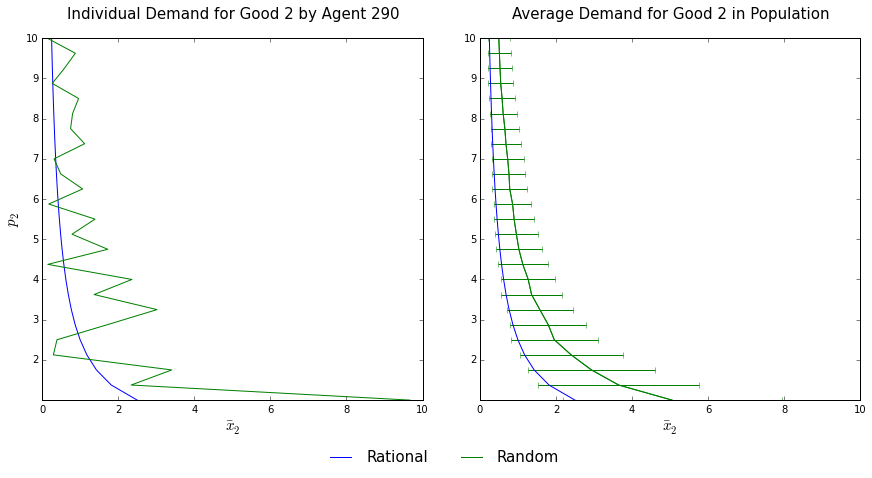

In [84]:
# Initialize canvas
fig, ax = plt.subplots(1,2,figsize=(12,6),sharex=True)

# Plot individual demands by types
ax[0].plot(individual_demands['rational'], PRICE_GRID, label='Rational')
ax[0].plot(individual_demands['random'], PRICE_GRID, label='Random')

# Plot market average demands by types
ax[1].plot(market_demands['rational']['demand'], PRICE_GRID, label='Rational')
ax[1].plot(market_demands['random']['demand'], PRICE_GRID, label='Random', color = 'g')
xerr = np.array(market_demands['random']['sd'])
ax[1].errorbar(market_demands['random']['demand'], PRICE_GRID, xerr=xerr)

# Set titles
ax[0].set_title('Individual Demand for Good 2 by Agent ' + str(idx), fontsize=15, y=1.04)
ax[1].set_title('Average Demand for Good 2 in Population', fontsize=15, y=1.04)

# Set axis labels
ax[0].set_xlabel(r'$\bar{x}_2$', fontsize=15)
ax[1].set_xlabel(r'$\bar{x}_2$', fontsize=15)
ax[0].set_ylabel(r'$p_2$', fontsize=15)

# Set axis ranges
ax[0].set_xlim([0, 10])
ax[0].set_ylim([1, 10])
ax[1].set_xlim([0, 10])
ax[1].set_ylim([1, 10])

# Set up legend
plt.legend(loc='upper center', bbox_to_anchor=(-0.10, -0.10),
    fancybox=False, frameon=False, shadow=False, ncol=3, fontsize=15)

# Remove first element on y-axis
ax[0].yaxis.get_major_ticks()[0].set_visible(False)
ax[1].yaxis.get_major_ticks()[0].set_visible(False)

# Adjust spacing between subplots
plt.tight_layout(pad=0.2, w_pad=3)

# Show plots
plt.show()

## OOP in the Generalized Roy Model

For completeness, let us return to the object-oriented implementation of the generalized Roy model. 


<img src="images/grmCls.png">

The full source code is availale [here](https://github.com/softEcon/course/blob/master/lectures/economic_models/generalized_roy/package/grmpy/tools/economics/clsAgent.py).

## Additional Resources


**Prediction in Economics **

Milton Friedman (1966). [Essays In Positive Economics](http://www.amazon.com/Essays-Positive-Economics-Phoenix-Books/dp/0226264033/ref=sr_1_1?ie=UTF8&qid=1430672274&sr=8-1&keywords=Essays+In+Positive+Economics). Chicago University Press, Chicago, IL.

Friedrich August von Hayek (1975). [The Pretense of Knowledge](http://www.nobelprize.org/nobel_prizes/economic-sciences/laureates/1974/hayek-lecture.html). The Swedish Journal of Economics. 77(4): 433-442.

**Object-Oriented Programming**

http://www.python-course.eu/object_oriented_programming.php

http://quant-econ.net/py/python_oop.html